Dataset shape: (131, 6)
     subject    subset  quantum_rest  padic_entropy_rest  quantum_task  \
0  subject_2  subset_1 -3.381483e+09            2.596264 -3.537126e+09   
1  subject_3  subset_1 -7.354620e+09            2.617142 -5.365969e+09   
2  subject_4  subset_1 -1.361392e+09            1.191982 -1.906462e+09   
3  subject_5  subset_1 -5.633856e+11            2.576419 -4.552206e+10   
4  subject_6  subset_1 -1.181967e+12            2.485187 -3.937892e+11   

   padic_entropy_task  
0            2.644676  
1            2.658400  
2            1.228048  
3            2.617095  
4            2.725932  
Missing values:
 subject               0
subset                0
quantum_rest          0
padic_entropy_rest    0
quantum_task          0
padic_entropy_task    0
dtype: int64
Columns: Index(['subject', 'subset', 'quantum_rest', 'padic_entropy_rest',
       'quantum_task', 'padic_entropy_task'],
      dtype='object')
Accuracy: 0.9259259259259259
Classification Report:
               pre

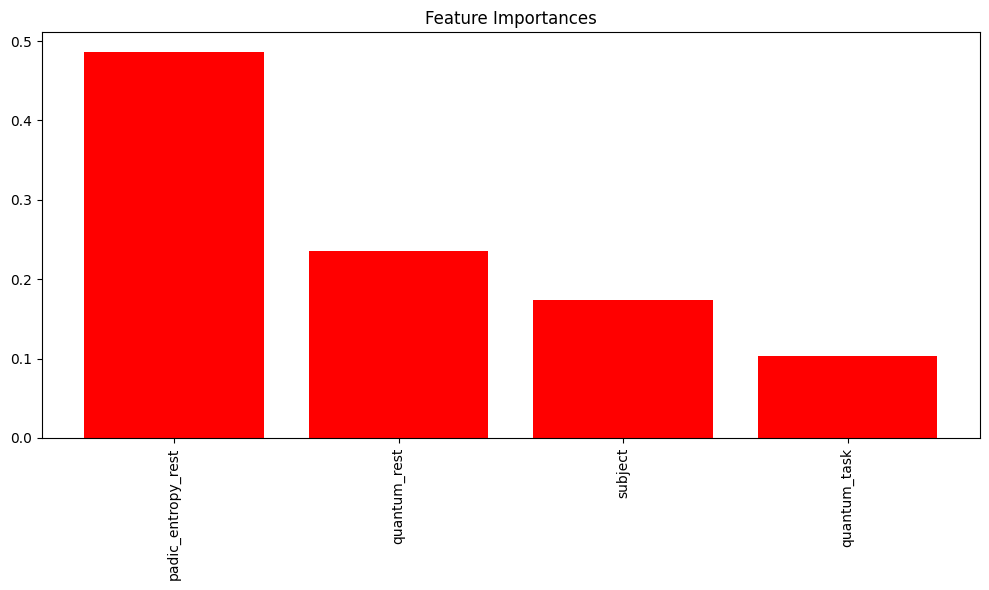

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('eeg_feature_summary_cleaned.csv')
print("Dataset shape:", df.shape)
print(df.head())

# STEP 1: Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values (or you can use imputation)
df = df.dropna()

# Identify features and label
# Example: assuming the label column is named 'target' (you might need to replace it)
print("Columns:", df.columns)

# Using 'subset' as the target variable
label_col = 'subset'
X = df.drop(['subject', label_col], axis=1)  # also dropping 'subject' as it's just an identifier
y = df[label_col]

# Encode labels if not numeric
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Optional: scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# STEP 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 3: Model Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# STEP 4: Evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Cross-Validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Accuracy:", np.mean(cv_scores))

# Feature Importance

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = df.drop(label_col, axis=1).columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


Dataset shape: (131, 6)
Missing values:
 subject               0
subset                0
quantum_rest          0
padic_entropy_rest    0
quantum_task          0
padic_entropy_task    0
dtype: int64

====== Random Forest ======
Test Accuracy: 0.9259
Cross-Validation Accuracy: 0.9011
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.91      0.91      0.91        11

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27


====== Logistic Regression ======
Test Accuracy: 0.9630
Cross-Validation Accuracy: 0.9023
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.91      0.95        11

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97    

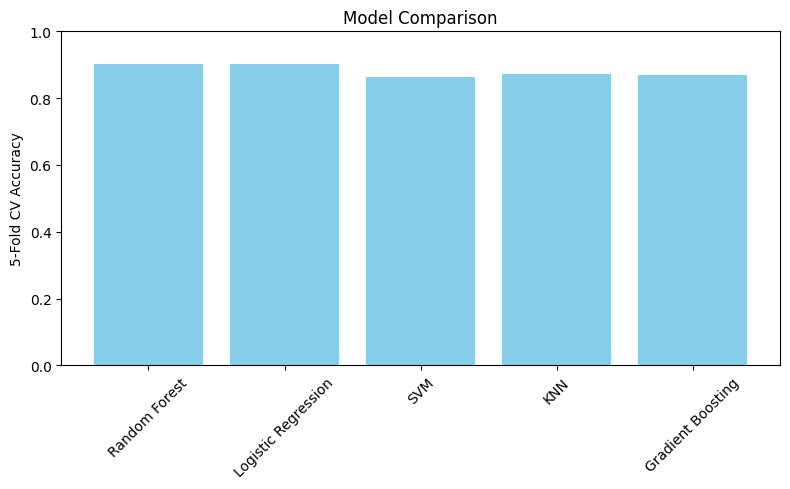

In [5]:
# ----------------------------
# STEP 1: Load Data
df = pd.read_csv('eeg_feature_summary_cleaned.csv')
print("Dataset shape:", df.shape)

# ----------------------------
# STEP 2: Preprocessing
print("Missing values:\n", df.isnull().sum())
df = df.dropna()
# Encode target if needed
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ----------------------------
# STEP 3: Model Dictionary
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# ----------------------------
# STEP 4: Training & Evaluation
cv_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_scaled, y, cv=5).mean()
    cv_results[name] = cv_score
    print(f"\n====== {name} ======")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Cross-Validation Accuracy: {cv_score:.4f}")
    print(classification_report(y_test, y_pred))

# ----------------------------
# STEP 5: Visualize Cross-Validation Scores
plt.figure(figsize=(8,5))
plt.bar(cv_results.keys(), cv_results.values(), color='skyblue')
plt.ylabel('5-Fold CV Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


2025-07-15 12:43:47,190 - Starting EEG data analysis
2025-07-15 12:43:47,198 - Loading dataset
2025-07-15 12:43:47,198 - Loading dataset
2025-07-15 12:43:47,261 - Preprocessing data
2025-07-15 12:43:47,261 - Preprocessing data


Dataset shape: (131, 6)
     subject    subset  quantum_rest  padic_entropy_rest  quantum_task  \
0  subject_2  subset_1 -3.381483e+09            2.596264 -3.537126e+09   
1  subject_3  subset_1 -7.354620e+09            2.617142 -5.365969e+09   
2  subject_4  subset_1 -1.361392e+09            1.191982 -1.906462e+09   
3  subject_5  subset_1 -5.633856e+11            2.576419 -4.552206e+10   
4  subject_6  subset_1 -1.181967e+12            2.485187 -3.937892e+11   

   padic_entropy_task  
0            2.644676  
1            2.658400  
2            1.228048  
3            2.617095  
4            2.725932  

Data types:
subject                object
subset                 object
quantum_rest          float64
padic_entropy_rest    float64
quantum_task          float64
padic_entropy_task    float64
dtype: object

Summary statistics:
       quantum_rest  padic_entropy_rest  quantum_task  padic_entropy_task
count  1.310000e+02          131.000000  1.310000e+02          131.000000
mean  -1.08

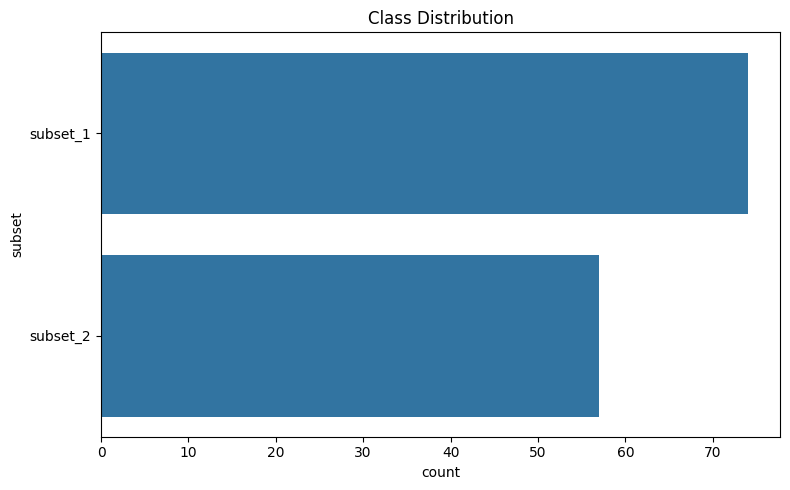

2025-07-15 12:43:47,522 - Scaling features
2025-07-15 12:43:47,532 - Training base Random Forest model
2025-07-15 12:43:47,532 - Training base Random Forest model



Encoded labels: [0 1]

Base Random Forest Model:
Accuracy: 0.9259259259259259
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.91      0.91      0.91        11

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



2025-07-15 12:43:47,980 - Calculating feature importance


Cross-Validation Accuracy: 0.9011396011396012


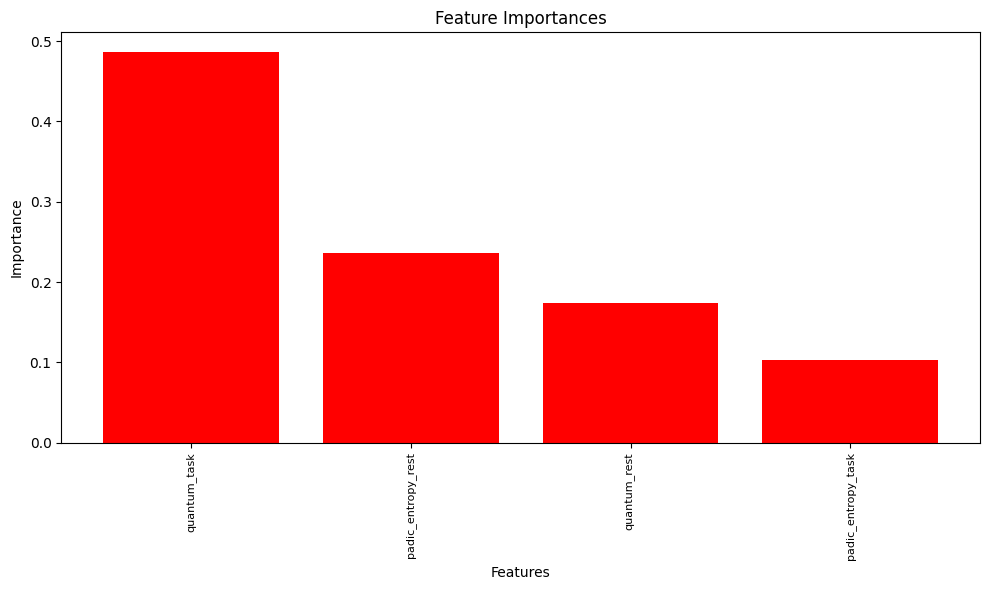

2025-07-15 12:43:48,060 - Training and comparing multiple models
2025-07-15 12:43:48,068 - Training Random Forest model
2025-07-15 12:43:48,068 - Training Random Forest model



====== Random Forest ======
Test Accuracy: 0.9259
Cross-Validation Accuracy: 0.9011
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.91      0.91      0.91        11

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



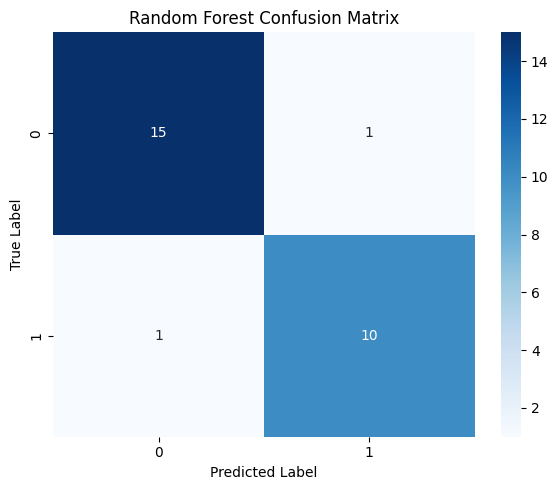

2025-07-15 12:43:48,797 - Training Logistic Regression model



====== Logistic Regression ======
Test Accuracy: 0.9630
Cross-Validation Accuracy: 0.9023
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.91      0.95        11

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27



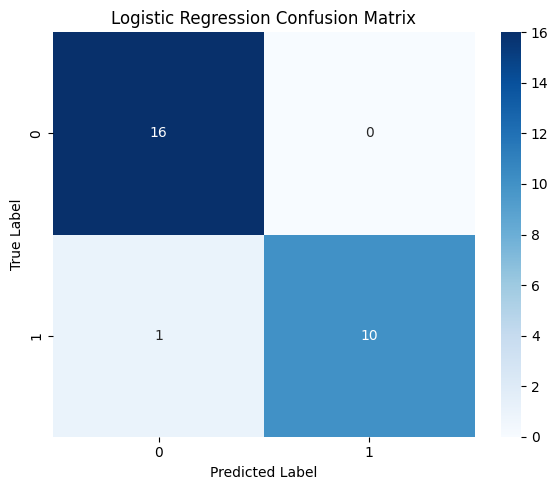

2025-07-15 12:43:48,986 - Training SVM model



====== SVM ======
Test Accuracy: 0.8889
Cross-Validation Accuracy: 0.8630
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.83      0.91      0.87        11

    accuracy                           0.89        27
   macro avg       0.88      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



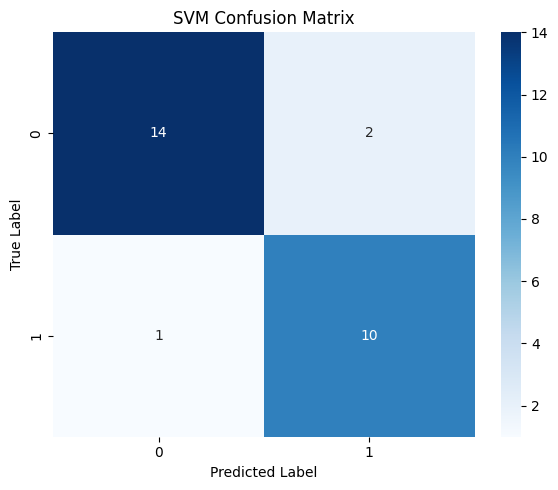

2025-07-15 12:43:49,158 - Training KNN model



====== KNN ======
Test Accuracy: 0.9259
Cross-Validation Accuracy: 0.8712
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.91      0.91      0.91        11

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



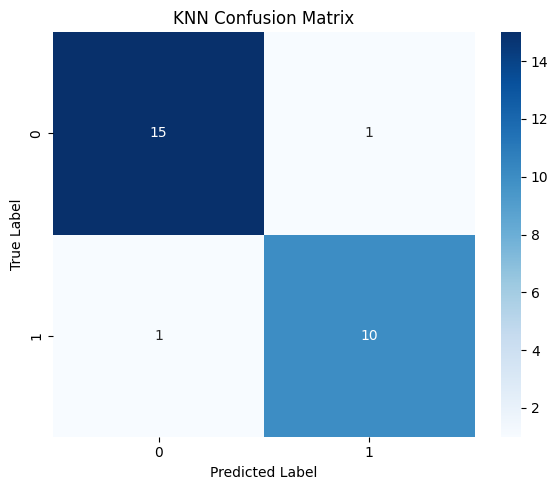

2025-07-15 12:43:49,322 - Training Gradient Boosting model



====== Gradient Boosting ======
Test Accuracy: 0.9630
Cross-Validation Accuracy: 0.8707
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.91      0.95        11

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27



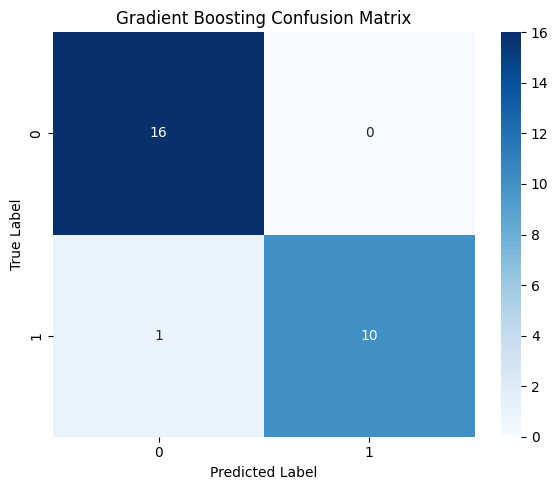

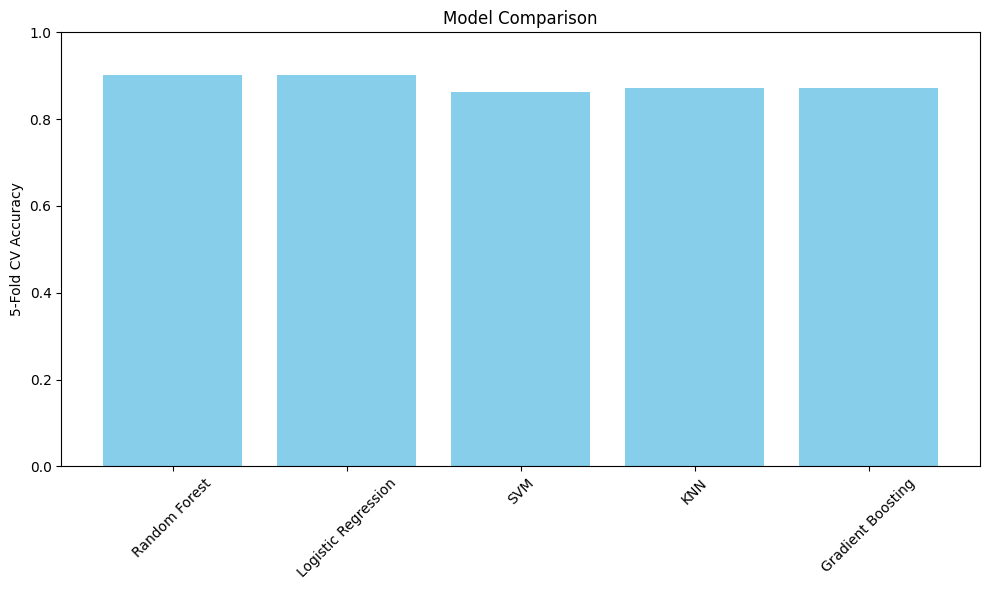

2025-07-15 12:43:50,544 - Performing hyperparameter tuning for Random Forest
2025-07-15 12:44:18,411 - Generating ROC curves
2025-07-15 12:44:18,411 - Generating ROC curves



Hyperparameter Tuning Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest Accuracy: 0.9259259259259259
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.91      0.91      0.91        11

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



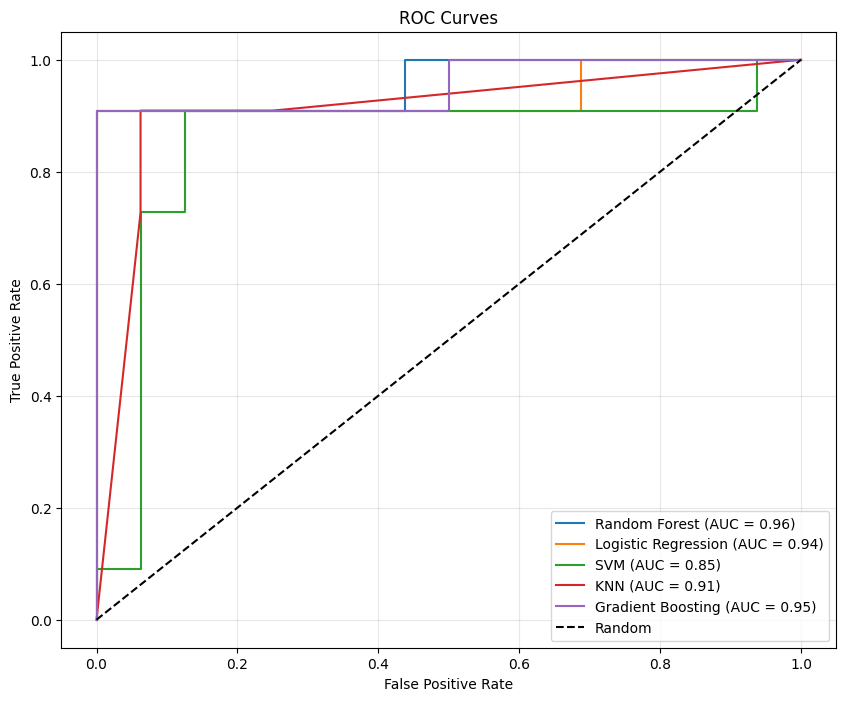

2025-07-15 12:44:18,578 - Saving the best model
2025-07-15 12:44:18,628 - Analysis completed successfully
2025-07-15 12:44:18,628 - Analysis completed successfully



Best model saved as 'best_eeg_model.pkl'

===== Analysis Summary =====
Dataset shape: (131, 6)
Best model: Random Forest with hyperparameter tuning
Best accuracy: 0.9259
Most important features: quantum_task, padic_entropy_rest, quantum_rest, padic_entropy_task


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import logging
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()
logger.info("Starting EEG data analysis")


# STEP 1: Data Loading and Exploration
logger.info("Loading dataset")
df = pd.read_csv('eeg_feature_summary_cleaned.csv')
print("Dataset shape:", df.shape)
print(df.head())

# Basic data exploration
print("\nData types:")
print(df.dtypes)

print("\nSummary statistics:")
print(df.describe())


# STEP 2: Data Preprocessing
logger.info("Preprocessing data")
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Handle missing values with imputation instead of dropping
imputer = SimpleImputer(strategy='mean')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
if df[numeric_columns].isnull().sum().sum() > 0:
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    print("\nMissing values after imputation:\n", df.isnull().sum())

# Identify features and label
print("\nColumns:", df.columns)

# Using 'subset' as the target variable
label_col = 'subset'
X = df.drop(['subject', label_col], axis=1)  # dropping 'subject' as it's just an identifier
y = df[label_col]

# Check class distribution
print("\nClass distribution:")
print(y.value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(y=y)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

# Encode labels if not numeric
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("\nEncoded labels:", np.unique(y))

# Feature scaling
logger.info("Scaling features")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
feature_names = X.columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check for class imbalance and apply SMOTE if needed
class_counts = np.bincount(y)
if np.min(class_counts) / np.max(class_counts) < 0.5:  # If imbalanced
    logger.info("Applying SMOTE for class imbalance")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_train).value_counts())


# STEP 3: Base Model Training
logger.info("Training base Random Forest model")
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print("\nBase Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(clf, X_scaled, y, cv=5)
print("Cross-Validation Accuracy:", np.mean(cv_scores))

# STEP 4: Feature Importance
logger.info("Calculating feature importance")
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90, fontsize=8)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# STEP 5: Multiple Models Comparison
logger.info("Training and comparing multiple models")
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

cv_results = {}
for name, model in models.items():
    logger.info(f"Training {name} model")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_scaled, y, cv=5).mean()
    cv_results[name] = cv_score
    print(f"\n====== {name} ======")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Cross-Validation Accuracy: {cv_score:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Visualize model comparison
plt.figure(figsize=(10, 6))
plt.bar(cv_results.keys(), cv_results.values(), color='skyblue')
plt.ylabel('5-Fold CV Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# STEP 6: Hyperparameter Tuning
logger.info("Performing hyperparameter tuning for Random Forest")
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nHyperparameter Tuning Results:")
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the optimized model
y_pred = best_rf.predict(X_test)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# STEP 7: ROC Curves
logger.info("Generating ROC curves")
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        
        # For multiclass, we'll use one-vs-rest approach
        if y_prob.shape[1] > 2:  # Multiclass
            for i in range(y_prob.shape[1]):
                fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{name} (class {i}, AUC = {roc_auc:.2f})', alpha=0.5)
        else:  # Binary classification
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()


# STEP 8: Save Best Model
logger.info("Saving the best model")
best_model = best_rf  # or choose based on evaluation metrics
joblib.dump(best_model, 'best_eeg_model.pkl')
print("\nBest model saved as 'best_eeg_model.pkl'")


# STEP 9: Summary
print("\n===== Analysis Summary =====")
print(f"Dataset shape: {df.shape}")
print(f"Best model: Random Forest with hyperparameter tuning")
print(f"Best accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Most important features: {', '.join(feature_names[indices[:5]])}")
logger.info("Analysis completed successfully")